In [1]:
#Modules.
from Classes import *
import LeakyFunctions as fun

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
#SIR-model for one season.
import numpy as np
from scipy.integrate import odeint

def SPIR(R0,Vr,s0,p0):
    nu = 0.5
    beta = nu*R0
    N = 1000000.0
    stepsSeason = 1000
        
    if N*s0 < 100:
        print 'Warning: N to small'
    
    def derivative(y,t):
        #S=y[0], P=y[1] I=y[2], R=y[3]
        
        dSdt = -(beta/N)*y[0]*y[2]
        dPdt = -(beta/N)*(1-Vr)*y[1]*y[2]
        
        dIdt = (beta/N)*(y[0]+(1-Vr)*y[1])*y[2] - nu*y[2]
        dRdt = nu*y[2]
        
        return [dSdt, dPdt, dIdt, dRdt]

    endTime = 1000
    time = np.linspace(0.0,endTime,stepsSeason)
    yinit = np.array([(s0-0.00001)*N,(p0-0.00001)*N,0.00002*N,(1-s0-p0)*N])

    y = odeint(derivative,yinit,time)
    
    proportions = np.array([[y[i,0]/N, y[i,1]/N, y[i,2]/N, y[i,3]/N] for i in range(len(y))])
    return time, proportions

Peak incidence: 
0.000913451956139


0.00091345195613876649

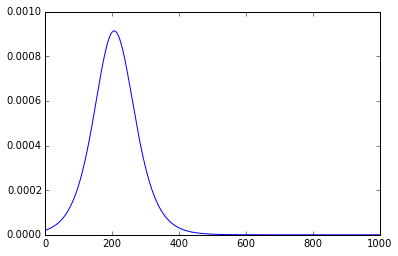

In [15]:
R0 = 1.4
Vr = 0.5

s0 = 0.7
p0 = 0.1

time,y = SPIR(R0,Vr,s0,p0)

plot(time,y[:,2])
xlim([0,1000])


print 'Peak incidence: '
print max(y[:,2])
fun.peakIncidence(R0,Vr,s0,p0)

In [17]:
print 'Final size SPIR:'
print (y[:,0][0]-y[:,0][-1], y[:,1][0]-y[:,1][-1])

print 'Final size equation:'

print fun.findFinalSizeLeakyVaccine(R0,s0,p0,Vr)


Final size SPIR:
(0.068111569943849593, 0.0049891664784968287)
Final size equation:
(0.067775413562297479, 0.0049643235082061817)
